<a href="https://colab.research.google.com/github/ManasPhanse/Geeky/blob/master/WP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
import warnings
import sklearn
import datetime
import matplotlib.pyplot as plt

In [2]:
from sklearn import pipeline, preprocessing, metrics, model_selection, ensemble
from sklearn_pandas import DataFrameMapper
from datetime import datetime

In [3]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory (28).csv


In [4]:
weather = pd.read_csv(io.BytesIO(uploaded["weatherHistory.csv"]), index_col='Formatted Date')
weather

,Temperature (C)
Formatted Date,
2006-04-11,11.5
2006-04-11,11.5
2006-04-12,12.0
2006-04-13,11.0
2006-04-14,11.5
2006-04-15,11.0
2006-04-16,12.0
2006-04-17,12.0
2006-04-18,11.0


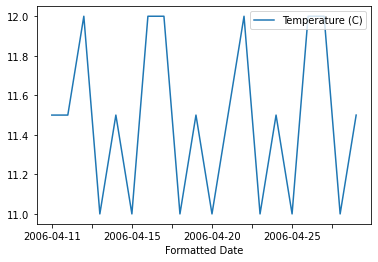

In [5]:
weather.plot()

In [6]:
X = weather.values
train = X[0:10]
train = train.reshape(-1,1)
test = X[10:]
predictions = []

In [7]:
train.size

10

In [8]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [10]:
predictions = model_ar_fit.predict(start=10, end=20)

In [11]:
test

array([[11. ],
       [11.5],
       [12. ],
       [11. ],
       [11.5],
       [11. ],
       [12. ],
       [12. ],
       [11. ],
       [11.5]])

In [12]:
predictions

array([11.39301633, 11.55223857, 11.73145494, 11.26311203, 11.46085735,
       11.46345767, 11.41793553, 11.572321  , 11.36970906, 11.41272004,
       11.45620083])

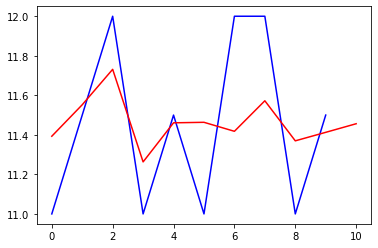

In [13]:
plt.plot(test, color='blue')
plt.plot(predictions, color='red')